In [1]:
import numpy as np
import pandas as pd

In [2]:
CONSIDER_COLUMN = ['id', 'species', 'phylum', 'gram',  'klass', 'order', 'family', 'genus', 'superkingdom']

In [3]:
microbe_dataSet = pd.read_csv('mimedb_microbes_v1.csv')
microbe_dataSet

,id,name,microbe_id,species,kingdom,phylum,ncbi_tax_id,activity,gram,oxygen_requirement,...,superkingdom,background,health_type,evidence_type,data_source,export,human_pathogen,genome_ids,parent_id,level
0,2,Micromonospora aurantiaca ATCC 27029,MMDBm0000002,Micromonospora aurantiaca,NaN,Actinobacteria,644283,Production (export),Positive,Aerobe,...,Bacteria,NaN,NaN,NaN,NaN,1,NaN,275,NaN,NaN
1,3,Acidaminococcus fermentans DSM 20731,MMDBm0000003,Acidaminococcus,NaN,Firmicutes,591001,NaN,Negative,Anaerobe,...,Bacteria,NaN,NaN,NaN,NaN,1,NaN,26,NaN,NaN
2,4,Acidaminococcus intestini RyC-MR95,MMDBm0000004,Acidaminococcus intestini,NaN,Firmicutes,568816,NaN,Negative,Anaerobe,...,Bacteria,NaN,NaN,NaN,NaN,1,NaN,36,NaN,NaN
3,6,Acinetobacter baumannii,MMDBm0000006,Acinetobacter baumannii,NaN,Proteobacteria,470,NaN,NaN,NaN,...,Bacteria,NaN,NaN,NaN,NaN,1,NaN,1096,NaN,NaN
4,7,Acinetobacter pittii ANC 4052,MMDBm0000007,Acinetobacter pittii,NaN,Proteobacteria,1217689,NaN,Negative,Aerobe,...,Bacteria,NaN,NaN,NaN,NaN,1,NaN,2443,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,881928,Halococcus morrhuae DSM 1307,MMDBm0881919,Halococcus morrhuae,NaN,Euryarchaeota,931277,NaN,Negative,Aerobe,...,Archaea,NaN,NaN,NaN,NaN,1,NaN,343; 1459,NaN,NaN
2170,881944,Methanomassiliicoccus luminyensis,MMDBm0881935,Methanomassiliicoccus luminyensis,NaN,Candidatus thermoplasmatota,1080712,NaN,NaN,Anaerobe,...,Archaea,NaN,NaN,NaN,NaN,1,NaN,1844; 1845,NaN,NaN
2171,882007,Halococcus morrhuae,MMDBm0881997,Halococcus morrhuae,NaN,Euryarchaeota,2250,NaN,NaN,Aerobe,...,Archaea,NaN,NaN,NaN,NaN,1,NaN,1914; 1915,NaN,NaN
2172,882192,Candidatus Nitrososphaera gargensis,MMDBm0882180,Candidatus Nitrososphaera gargensis,NaN,Nitrososphaerota,497727,NaN,NaN,NaN,...,Archaea,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [47]:
microbe_dataSet['gram'].value_counts()

Positive                                      461
Negative                                      419
Uncharacterized                                10
Variable                                        7
Structurally positive but stains negative       6
Negative due to the absence of a cell wall      2
Name: gram, dtype: int64

In [45]:
microbe_dataSet['activity'].isna().sum()

2129

In [44]:
microbe_dataSet.isna().mean().sort_values()

# when impute the species
# imputation plan 1: use all the ranks except strain
# imputation plan 2: use all the ranks with strain
# compare to see if they are the same
# send to lucy


# # species
# # oxygen_requirement

# after impute species with, 

id                     0.000000
superkingdom           0.000000
created_at             0.000000
export                 0.000000
ncbi_tax_id            0.000000
updated_at             0.000000
name                   0.000000
microbe_id             0.000000
phylum                 0.000460
klass                  0.002300
order                  0.002760
family                 0.007360
genus                  0.017939
genome_ids             0.103956
species                0.147654
oxygen_requirement     0.324287
gram                   0.583717
strain                 0.648114
shape                  0.688132
metabolism             0.709292
habitat                0.854186
temperature_range      0.855106
biotic_relationship    0.857866
mobility               0.858326
number_of_membranes    0.863845
flagella_presence      0.871665
kingdom                0.874425
sporulation            0.885005
cell_arrangement       0.895124
optimal_temperature    0.931923
energy_source          0.963661
human_pa

In [34]:
microbe_dataSet['shape'].isna().mean()#.columns

0.6881324747010119

In [6]:
# data cleaning stage

# selecting specific columns
cleaned_microData = microbe_dataSet[CONSIDER_COLUMN]

# query neccessary columns
cleaned_microData = cleaned_microData[(cleaned_microData['gram'] != 'Uncharacterized') &
                                      (cleaned_microData['gram'] != 'Variable')]

# converting column into binary data type
cleaned_microData['binary_gram'] = (cleaned_microData['gram']
                                    .apply(lambda status: status if status in ['Positive', 'Negative', np.NaN] else 'Negative'))

cleaned_microData['binary_gram'].isna().sum()

1269

data imputation
- missing value, but have the correct something where

- missing value, we don't have the correct case
    - reseracher, don't care


impute data with correct answer
a model that has shows the imputated data has high accuracy on the family type -> the imputation is successful 

In [14]:
cleaned_microData#['family'].value_counts().unique()

,id,species,phylum,gram,klass,order,family,genus,superkingdom,binary_gram
0,2,Micromonospora aurantiaca,Actinobacteria,Positive,Actinobacteria,Actinomycetales,Micromonosporaceae,Micromonospora,Bacteria,Positive
1,3,Acidaminococcus,Firmicutes,Negative,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,Bacteria,Negative
2,4,Acidaminococcus intestini,Firmicutes,Negative,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,Bacteria,Negative
3,6,Acinetobacter baumannii,Proteobacteria,NaN,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,Bacteria,NaN
4,7,Acinetobacter pittii,Proteobacteria,Negative,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,Bacteria,Negative
...,...,...,...,...,...,...,...,...,...,...
2169,881928,Halococcus morrhuae,Euryarchaeota,Negative,Halobacteria,Halobacteriales,Halobacteriaceae,Halococcus,Archaea,Negative
2170,881944,Methanomassiliicoccus luminyensis,Candidatus thermoplasmatota,NaN,Thermoplasmata,Methanomassiliicoccales,Methanomassiliicoccaceae,Methanomassiliicoccus,Archaea,NaN
2171,882007,Halococcus morrhuae,Euryarchaeota,NaN,Halobacteria,Halobacteriales,Halococcaceae,Halococcus,Archaea,NaN
2172,882192,Candidatus Nitrososphaera gargensis,Nitrososphaerota,NaN,Nitrososphaeria,Nitrososphaerales,Nitrososphaeraceae,Nitrososphaera,Archaea,NaN


In [29]:
cleaned_microData['family'].isna().mean()

0.007417709782104775

In [26]:
for i in cleaned_microData.columns:
    print(i, len(cleaned_microData[i].unique()))



id 2157
species 1105
phylum 36
gram 5
klass 80
order 159
family 297
genus 557
superkingdom 4
binary_gram 3


In [22]:
cleaned_microData['phylum'].unique()

array(['Actinobacteria', 'Firmicutes', 'Proteobacteria',
       'Verrucomicrobia', 'Bacteroidetes', 'Euryarchaeota',
       'Synergistetes', 'Fusobacteria', 'Spirochaetes',
       'Deinococcus-thermus', 'Fibrobacteres', 'Chlorobi', 'Chloroflexi',
       'Tenericutes', 'Crenarchaeota', 'Thermotogae', 'Ascomycota',
       'Euglenozoa', 'Deferribacteres', 'Chlamydiae', 'Basidiomycota',
       'Chytridiomycota', 'Microsporidia', 'Mucoromycota', nan,
       'Peploviricota', 'Uroviricota', 'Hofneiviricota', 'Cossaviricota',
       'Cressdnaviricota', 'Negarnaviricota', 'Aquificae', 'Nitrospirae',
       'Planctomycetes', 'Candidatus thermoplasmatota',
       'Nitrososphaerota'], dtype=object)

1. everything, expect the species
2. everything, expect the species and genus
3. find withone is better
4. after impute gram type, do a follow up species prediction using cross validation


In [5]:
cleaned_microData['binary_gram'].isna().mean()

NameError: name 'cleaned_microData' is not defined

<AxesSubplot:>

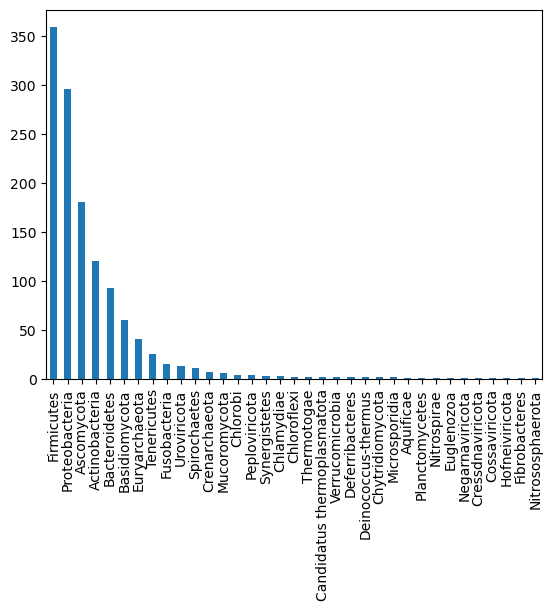

In [38]:
cleaned_microData[cleaned_microData['binary_gram'].isna()]['phylum'].value_counts().plot(kind='bar')